<a href="https://colab.research.google.com/github/apurbpraxis/Retail_RFM_Clustering-MBA-/blob/main/Retail_RFM_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
#data download from UCI ML repository
!wget https://docs.google.com/spreadsheets/d/134ORze0xOYHw88pmHqusr2ZeWZsBDN9G/edit?usp=share_link&ouid=103384364394669167553&rtpof=true&sd=true

--2022-11-21 16:30:19--  https://docs.google.com/spreadsheets/d/134ORze0xOYHw88pmHqusr2ZeWZsBDN9G/edit?usp=share_link
Resolving docs.google.com (docs.google.com)... 172.217.203.139, 172.217.203.102, 172.217.203.101, ...
Connecting to docs.google.com (docs.google.com)|172.217.203.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘edit?usp=share_link.1’

edit?usp=share_link     [ <=>                ] 243.74K  --.-KB/s    in 0.1s    

2022-11-21 16:30:19 (2.09 MB/s) - ‘edit?usp=share_link.1’ saved [249586]



In [32]:
import pandas as pd
import numpy as np

In [33]:
#read the data
df=pd.read_excel('Online Retail.xlsx')

In [34]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365.0,71053.0,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365.0,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [35]:
import datetime as dt#Date time library
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler#for scaling
from sklearn.cluster import KMeans#Kmeans Clustering
import os#operating system

In [36]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [37]:
df= df.dropna(subset=['CustomerID'])

In [38]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365.0,71053.0,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365.0,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [39]:
df.isnull().sum().sum()#checking total null values

0

In [40]:
#check and clean duplicate data
df.duplicated().sum()

5225

In [41]:
df = df.drop_duplicates()#droping duplicates

In [42]:
df.duplicated().sum()

0

In [43]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [44]:
from datetime import datetime
from datetime import timedelta
convert_dict = {'InvoiceDate': str}
df = df.astype(convert_dict)
print(df.dtypes)

InvoiceNo       object
StockCode       object
Description     object
Quantity       float64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


In [45]:
df['InvoiceDate']= pd.to_datetime(df['InvoiceDate'])
df['order_date'] = [d.date() for d in df['InvoiceDate']]#separting date
df['order_time'] = [d.time() for d in df['InvoiceDate']]#Seperating time

In [46]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_date,order_time
0,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00
1,536365.0,71053.0,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
2,536365.0,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00
3,536365.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
4,536365.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00


In [47]:
df['order_date']= pd.to_datetime(df['order_date'])
date = datetime.strptime('2018-11-10 10:55:31', '%Y-%m-%d %H:%M:%S')

In [48]:
df=df[(df['Quantity']>0) & (df['UnitPrice']>0)]#filtering uintprice and quantity

In [49]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [50]:
#New Total Sum Column  
df['TotalSum'] = df['UnitPrice']* df['Quantity']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [51]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_date,order_time,TotalSum
0,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,15.30
1,536365.0,71053.0,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,20.34
2,536365.0,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,22.00
3,536365.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,20.34
4,536365.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,20.34


In [52]:
#Data preparation steps
print('Min Invoice Date:',df.order_date.dt.date.min(),'max Invoice Date:',df.order_date.dt.date.max())

Min Invoice Date: 2010-12-01 max Invoice Date: 2011-12-09


In [53]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_date,order_time,TotalSum
0,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,15.30
1,536365.0,71053.0,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,20.34
2,536365.0,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,22.00


In [54]:
#
snapshot_date = df['order_date'].max() + dt.timedelta(days=1)

In [55]:
snapshot_date

Timestamp('2011-12-10 00:00:00')

In [56]:
#calculate rfm metrics
rfm = df.groupby(['CustomerID']).agg({'order_date': lambda x : (snapshot_date - x.max()).days,'InvoiceNo':'count','TotalSum': 'sum'})

In [57]:
rfm.head()

,order_date,InvoiceNo,TotalSum
CustomerID,,,
12346.0,326,1,77183.60
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40


In [58]:
#Rename columns 
rfm.rename(columns={'order_date':'Recency','InvoiceNo':'Frequency','TotalSum':'MonetaryValue'},inplace= True)

In [59]:
rfm.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,1,77183.60
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40


In [60]:
#Building RFM Segments
r_labels =range(4,0,-1)#starting from four to zero with step -1
f_labels=range(1,5)
m_labels=range(1,5)
r_quartiles = pd.qcut(rfm['Recency'], q=4, labels = r_labels)
f_quartiles = pd.qcut(rfm['Frequency'],q=4, labels = f_labels)
m_quartiles = pd.qcut(rfm['MonetaryValue'],q=4,labels = m_labels)
rfm = rfm.assign(R=r_quartiles,F=f_quartiles,M=m_quartiles)

In [61]:
#Build RFM Segment and RFM Score
def add_rfm(x) : return str(x['R']) + str(x['F']) + str(x['M'])
rfm['RFM_Segment'] = rfm.apply(add_rfm,axis=1 )
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)

In [62]:
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,4,1.01.04.0,6
12347.0,3,182,4310.00,4,4,4,4.04.04.0,12
12348.0,76,31,1797.24,2,2,4,2.02.04.0,8
12349.0,19,73,1757.55,3,3,4,3.03.04.0,10
12350.0,311,17,334.40,1,1,2,1.01.02.0,4


In [63]:
#investigate the size of the segments
rfm.groupby(['RFM_Segment']).size().sort_values(ascending=False)[:5]

RFM_Segment
4.04.04.0    443
1.01.01.0    381
3.04.04.0    222
1.02.02.0    206
2.01.01.0    181
dtype: int64

In [64]:
#Summary metrics per RFM Score
rfm.groupby('RFM_Score').agg({'Recency': 'mean','Frequency': 'mean','MonetaryValue': ['mean', 'count'] }).round(1)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3           261.2       8.2         157.4   381
4           177.0      13.6         239.6   391
5           152.9      21.1         366.8   519
6            96.1      28.0         818.9   461
7            80.7      38.2         763.0   456
8            64.2      56.2         987.3   459
9            46.6      78.9        1804.5   410
10           33.0     110.9        2065.2   428
11           21.6     187.2        4050.3   390
12            7.6     371.0        9393.2   443

In [65]:
#Use RFM score to group customers into gold, silver and bronze segments
def segments(df):
  if df['RFM_Score'] > 9 :
    return 'Gold'
  elif (df['RFM_Score'] > 5) and (df['RFM_Score'] <= 9 ):
    return 'Silver'
  else:
    return 'Bronze'
rfm['General_Segment'] = rfm.apply(segments,axis=1)
rfm.groupby('General_Segment').agg({'Recency':'mean','Frequency':'mean',
'MonetaryValue':['mean','count']}).round(1)

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Bronze            192.2      15.0         266.5  1291
Gold               20.6     225.9        5253.6  1261
Silver             72.6      49.5        1074.2  1786

In [66]:
#Merged rfm and main dataframe
mdf=pd.merge(df,rfm,on='CustomerID')
mdf

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_date,order_time,TotalSum,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment
0,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,15.30,373,297,5391.21,1,4,4,1.04.04.0,9,Silver
1,536365.0,71053.0,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,20.34,373,297,5391.21,1,4,4,1.04.04.0,9,Silver
2,536365.0,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,22.00,373,297,5391.21,1,4,4,1.04.04.0,9,Silver
3,536365.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,20.34,373,297,5391.21,1,4,4,1.04.04.0,9,Silver
4,536365.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,20.34,373,297,5391.21,1,4,4,1.04.04.0,9,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392687,581578.0,22993.0,SET OF 4 PANTRY JELLY MOULDS,12.0,2011-12-09 12:16:00,1.25,12713.0,Germany,2011-12-09,12:16:00,15.00,1,38,848.55,4,2,3,4.02.03.0,9,Silver
392688,581578.0,22907.0,PACK OF 20 NAPKINS PANTRY DESIGN,12.0,2011-12-09 12:16:00,0.85,12713.0,Germany,2011-12-09,12:16:00,10.20,1,38,848.55,4,2,3,4.02.03.0,9,Silver
392689,581578.0,22908.0,PACK OF 20 NAPKINS RED APPLES,12.0,2011-12-09 12:16:00,0.85,12713.0,Germany,2011-12-09,12:16:00,10.20,1,38,848.55,4,2,3,4.02.03.0,9,Silver
392690,581578.0,23215.0,JINGLE BELL HEART ANTIQUE SILVER,12.0,2011-12-09 12:16:00,2.08,12713.0,Germany,2011-12-09,12:16:00,24.96,1,38,848.55,4,2,3,4.02.03.0,9,Silver


In [67]:
#Created 3 data frames based on RFM segments to perform MBA
Bronze_seg = mdf[mdf.General_Segment == 'Bronze']
Bronze_seg
Silver_seg = mdf[mdf.General_Segment == 'Bronze']
Silver_seg
Gold_seg = mdf[mdf.General_Segment == 'Bronze']
Gold_seg

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_date,order_time,TotalSum,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment
744,536374.0,21258.0,VICTORIAN SEWING BOX LARGE,32.0,2010-12-01 09:09:00,10.95,15100.0,United Kingdom,2010-12-01,09:09:00,350.40,334,3,876.00,1,1,3,1.01.03.0,5,Bronze
745,537767.0,21258.0,VICTORIAN SEWING BOX LARGE,32.0,2010-12-08 12:09:00,10.95,15100.0,United Kingdom,2010-12-08,12:09:00,350.40,334,3,876.00,1,1,3,1.01.03.0,5,Bronze
746,540563.0,21258.0,VICTORIAN SEWING BOX LARGE,16.0,2011-01-10 10:35:00,10.95,15100.0,United Kingdom,2011-01-10,10:35:00,175.20,334,3,876.00,1,1,3,1.01.03.0,5,Bronze
3668,536384.0,82484.0,WOOD BLACK BOARD ANT WHITE FINISH,3.0,2010-12-01 09:53:00,6.45,18074.0,United Kingdom,2010-12-01,09:53:00,19.35,374,13,489.60,1,1,2,1.01.02.0,4,Bronze
3669,536384.0,84755.0,COLOUR GLASS T-LIGHT HOLDER HANGING,48.0,2010-12-01 09:53:00,0.65,18074.0,United Kingdom,2010-12-01,09:53:00,31.20,374,13,489.60,1,1,2,1.01.02.0,4,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388222,577755.0,22086.0,PAPER CHAIN KIT 50'S CHRISTMAS,6.0,2011-11-21 14:49:00,2.95,17010.0,United Kingdom,2011-11-21,14:49:00,17.70,19,11,195.36,3,1,1,3.01.01.0,5,Bronze
388223,577755.0,22910.0,PAPER CHAIN KIT VINTAGE CHRISTMAS,6.0,2011-11-21 14:49:00,2.95,17010.0,United Kingdom,2011-11-21,14:49:00,17.70,19,11,195.36,3,1,1,3.01.01.0,5,Bronze
388224,577755.0,22530.0,MAGIC DRAWING SLATE DOLLY GIRL,24.0,2011-11-21 14:49:00,0.42,17010.0,United Kingdom,2011-11-21,14:49:00,10.08,19,11,195.36,3,1,1,3.01.01.0,5,Bronze
388225,577755.0,22492.0,MINI PAINT SET VINTAGE,36.0,2011-11-21 14:49:00,0.65,17010.0,United Kingdom,2011-11-21,14:49:00,23.40,19,11,195.36,3,1,1,3.01.01.0,5,Bronze


Data Pre-Processing for K-means Clustering

In [68]:
rfm_rfm = rfm[['Recency','Frequency','MonetaryValue']]
print(rfm_rfm.describe())

           Recency    Frequency  MonetaryValue
count  4338.000000  4338.000000    4338.000000
mean     93.059474    90.523744    2048.688081
std     100.012264   225.506968    8985.230220
min       1.000000     1.000000       3.750000
25%      18.000000    17.000000     306.482500
50%      51.000000    41.000000     668.570000
75%     142.750000    98.000000    1660.597500
max     374.000000  7676.000000  280206.020000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

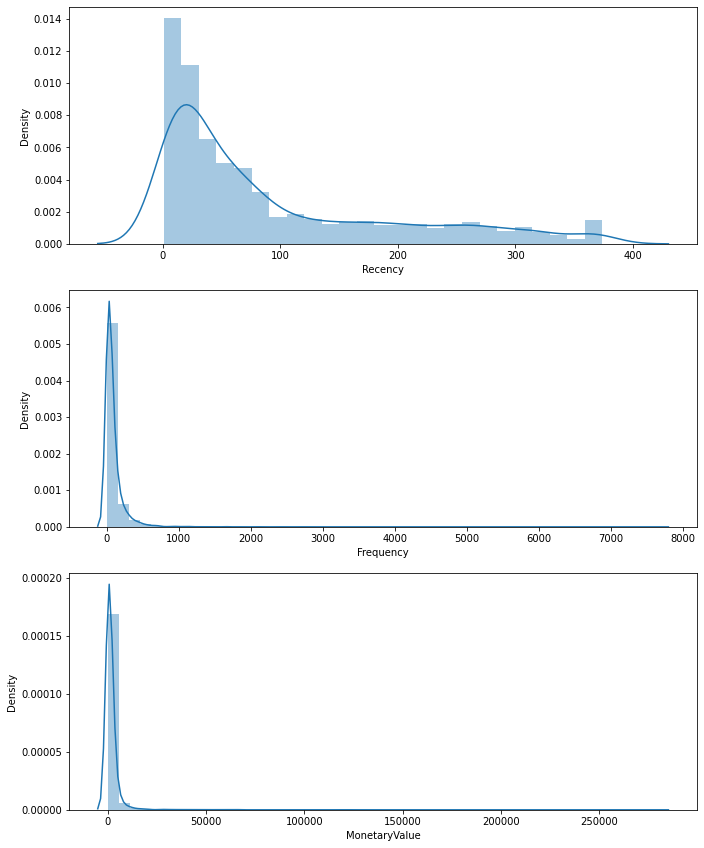

In [69]:
#Plot the distribution of RFM values
f,ax = plt.subplots(figsize=(10, 12))
plt.subplot(3, 1, 1); sns.distplot(rfm.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfm.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfm.MonetaryValue, label = 'Monetary Value')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

In [70]:
#Unskew the data with log transformation
rfm_log = rfm[['Recency', 'Frequency', 'MonetaryValue']].apply(np.log, axis = 1).round(3)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

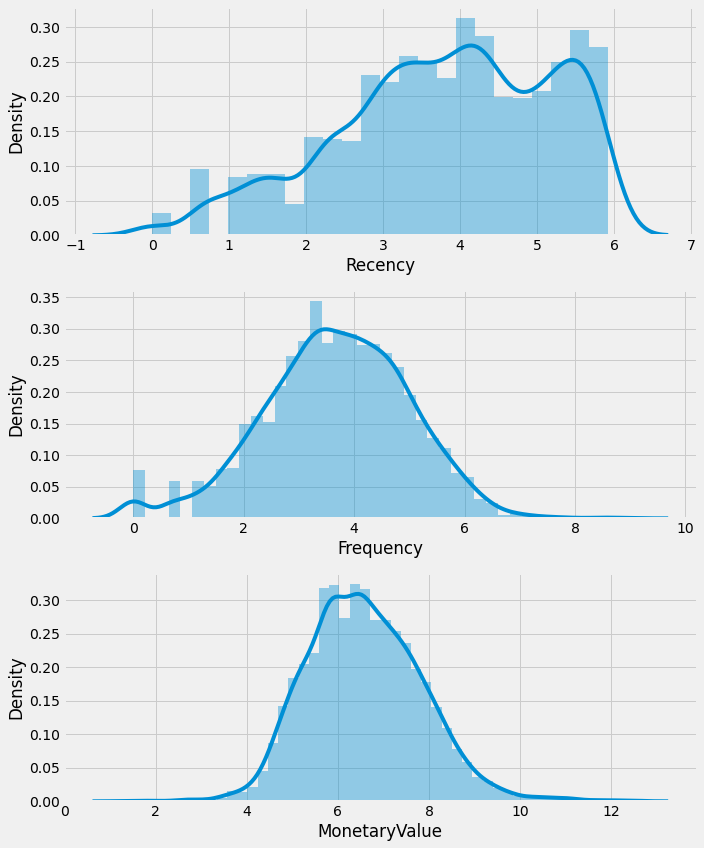

In [71]:
#plot the distribution of RFM values
f,ax = plt.subplots(figsize=(10, 12))
plt.subplot(3, 1, 1); sns.distplot(rfm_log.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfm_log.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfm_log.MonetaryValue, label = 'Monetary Value')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

In [72]:
#Implementation of K-Means Clustering

In [73]:
#Normalize the variables with StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfm_log)
#Store it separately for clustering
rfm_normalized= scaler.transform(rfm_log)

In [74]:
#choosing number of clusters
from sklearn.cluster import KMeans
#First : Get the Best KMeans 
ks = range(1,8)
inertias=[]
for k in ks :
    # Create a KMeans clusters
    kc = KMeans(n_clusters=k,random_state=1)
    kc.fit(rfm_normalized)
    inertias.append(kc.inertia_)

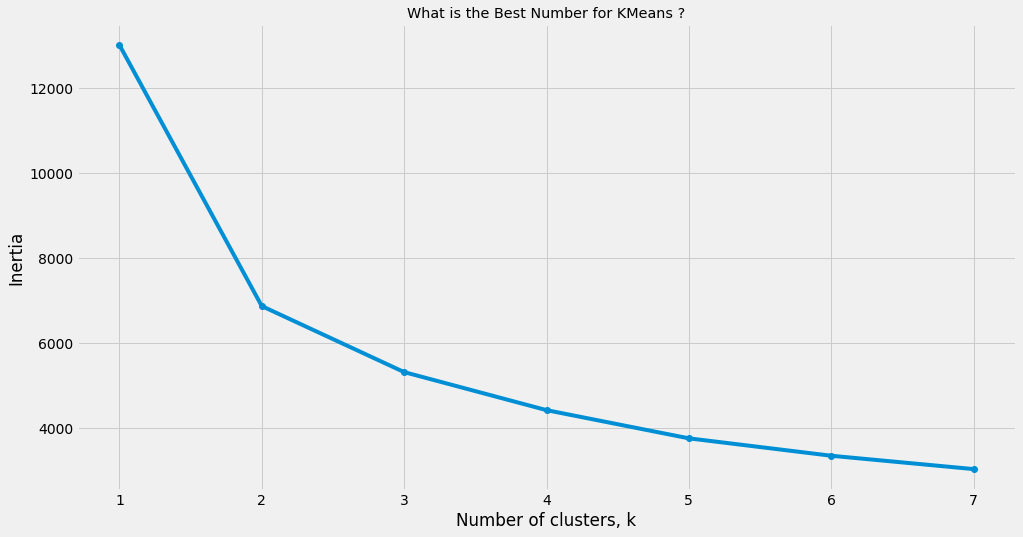

In [75]:
# Plot ks vs inertias
f, ax = plt.subplots(figsize=(15, 8))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('What is the Best Number for KMeans ?')
plt.show()

In [76]:
#CLUSTERING

In [77]:
kc = KMeans(n_clusters= 3, random_state=1)
kc.fit(rfm_normalized)

#Create a cluster label column in the original DataFrame
cluster_labels = kc.labels_

#Calculate average RFM values and size for each cluster:
rfm_rfm_k3 = rfm_rfm.assign(K_Cluster = cluster_labels)

#Calculate average RFM values and sizes for each cluster:
rfm_rfm_k3.groupby('K_Cluster').agg({'Recency': 'mean','Frequency': 'mean','MonetaryValue': ['mean', 'count'],}).round(0)

Recency Frequency MonetaryValue      
             mean      mean          mean count
K_Cluster                                      
0           172.0      15.0         294.0  1524
1            69.0      65.0        1158.0  1854
2            14.0     260.0        6555.0   960

Market Basket Analysis
(Apriori Algorithm)

In [78]:
#Created 3 data frames based on RFM segments to perform MBA
Bronze_seg = mdf[mdf.General_Segment == 'Bronze']
Bronze_seg
Silver_seg = mdf[mdf.General_Segment == 'Bronze']
Silver_seg
Gold_seg = mdf[mdf.General_Segment == 'Bronze']
Gold_seg

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_date,order_time,TotalSum,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment
744,536374.0,21258.0,VICTORIAN SEWING BOX LARGE,32.0,2010-12-01 09:09:00,10.95,15100.0,United Kingdom,2010-12-01,09:09:00,350.40,334,3,876.00,1,1,3,1.01.03.0,5,Bronze
745,537767.0,21258.0,VICTORIAN SEWING BOX LARGE,32.0,2010-12-08 12:09:00,10.95,15100.0,United Kingdom,2010-12-08,12:09:00,350.40,334,3,876.00,1,1,3,1.01.03.0,5,Bronze
746,540563.0,21258.0,VICTORIAN SEWING BOX LARGE,16.0,2011-01-10 10:35:00,10.95,15100.0,United Kingdom,2011-01-10,10:35:00,175.20,334,3,876.00,1,1,3,1.01.03.0,5,Bronze
3668,536384.0,82484.0,WOOD BLACK BOARD ANT WHITE FINISH,3.0,2010-12-01 09:53:00,6.45,18074.0,United Kingdom,2010-12-01,09:53:00,19.35,374,13,489.60,1,1,2,1.01.02.0,4,Bronze
3669,536384.0,84755.0,COLOUR GLASS T-LIGHT HOLDER HANGING,48.0,2010-12-01 09:53:00,0.65,18074.0,United Kingdom,2010-12-01,09:53:00,31.20,374,13,489.60,1,1,2,1.01.02.0,4,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388222,577755.0,22086.0,PAPER CHAIN KIT 50'S CHRISTMAS,6.0,2011-11-21 14:49:00,2.95,17010.0,United Kingdom,2011-11-21,14:49:00,17.70,19,11,195.36,3,1,1,3.01.01.0,5,Bronze
388223,577755.0,22910.0,PAPER CHAIN KIT VINTAGE CHRISTMAS,6.0,2011-11-21 14:49:00,2.95,17010.0,United Kingdom,2011-11-21,14:49:00,17.70,19,11,195.36,3,1,1,3.01.01.0,5,Bronze
388224,577755.0,22530.0,MAGIC DRAWING SLATE DOLLY GIRL,24.0,2011-11-21 14:49:00,0.42,17010.0,United Kingdom,2011-11-21,14:49:00,10.08,19,11,195.36,3,1,1,3.01.01.0,5,Bronze
388225,577755.0,22492.0,MINI PAINT SET VINTAGE,36.0,2011-11-21 14:49:00,0.65,17010.0,United Kingdom,2011-11-21,14:49:00,23.40,19,11,195.36,3,1,1,3.01.01.0,5,Bronze


In [79]:
basket_bronze = (Bronze_seg.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))

In [80]:
basket_bronze.head() 
basket_bronze.copy = basket_bronze 
basket_bronze.copy.head() 

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,I LOVE LONDON MINI BACKPACK,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,...,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEARTS PLANT POT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536374.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536384.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536388.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536393.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536403.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
basket_bronze.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1711 entries, 536374.0 to 577755.0
Columns: 2831 entries,  4 PURPLE FLOCK DINNER CANDLES to ZINC WILLIE WINKIE  CANDLE STICK
dtypes: float64(2831)
memory usage: 37.0 MB


In [82]:
basket_bronze.copy = basket_bronze.copy.astype(int)
basket_bronze.copy.shape

(1711, 2831)

In [83]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_bronze_sets = basket_bronze.copy.applymap(encode_units)
basket_bronze_sets.drop('POSTAGE', inplace=True, axis=1)
basket_bronze_sets.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,I LOVE LONDON MINI BACKPACK,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,...,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEARTS PLANT POT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536374.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536384.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536388.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536393.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536403.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
%matplotlib inline

frequent_itemsets_bronze = apriori(basket_bronze_sets, min_support=0.03, use_colnames=True)

#Build frequent itemsets
frequent_itemsets_bronze['length'] = frequent_itemsets_bronze['itemsets'].apply(lambda x: len(x))
frequent_itemsets_bronze  

rules_bronze = association_rules(frequent_itemsets_bronze, metric="lift", min_threshold=1)
rules_bronze

#Products having 70% confidence likely to be purchased together
rules_bronze[(rules_bronze['lift'] >= 6) & (rules_bronze['confidence'] >= 0.7)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
